<a href="https://colab.research.google.com/github/Rtengmiami/UBA_NCCU_110/blob/main/UBA_110_NCCU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
from datetime import datetime
import time
pd.set_option('display.max_columns', None)


## **Data processing**

In [194]:
df = pd.read_csv('/content/drive/MyDrive/Python/UBA/UBA_NCCU_110.csv',header = 0 )
df.tail()

,Date,OPP,score,Type,NAME,MPG,PTS,FG投籃數,Unnamed: 8,Unnamed: 9,2P二分球,Unnamed: 11,Unnamed: 12,3P三分球,Unnamed: 14,Unnamed: 15,FT罰球,Unnamed: 17,Unnamed: 18,Rebound籃板,Unnamed: 20,Unnamed: 21,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF
253,2022/1/27,世新大學,103W：67,UBA預賽,黃子軒,3:55,2,1,3,33%,1,3,33%,0,0,0%,0,0,0%,0,0,0,0,0,0,1,-1,1,0,0,0,2,0
254,2022/2/25,台灣師大,76W：42,UBA八強,黃子軒,5:01,2,1,4,25%,1,4,25%,0,0,0%,0,0,0%,1,1,2,0,0,0,1,0,-2,0,0,2,0,0
255,2022/3/1,義守大學,109W：77,UBA八強,黃子軒,3:46,0,0,0,0%,0,0,0%,0,0,0%,0,0,0%,0,1,1,0,0,0,0,1,3,0,0,0,0,0
256,2022/3/2,萬能科大,107W：64,UBA八強,黃子軒,5:50,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,0,2,2,1,0,1,0,8,14,2,0,0,0,0
257,2022/3/4,台灣藝大,79W：65,UBA八強,黃子軒,30:10:00,14,7,13,54%,7,13,54%,0,0,0%,0,2,0%,3,7,10,0,0,0,3,10,1,3,0,2,2,0


In [195]:
df.rename(columns={"Unnamed: 8":"FG投籃數","FG投籃數":"FG","Unnamed: 9":"FG %","Unnamed: 11":"2P投籃數","Unnamed: 12":"2P %","Unnamed: 14":"2P投籃數","Unnamed: 15":"3P %","Unnamed: 17":"FT投籃數","Unnamed: 18":"FT %","Rebound籃板":"OFF","Unnamed: 20":"DEF","Unnamed: 21":"Rebound"},inplace = True)
df.head()

,Date,OPP,score,Type,NAME,MPG,PTS,FG,FG投籃數,FG %,2P二分球,2P投籃數,2P %,3P三分球,2P投籃數,3P %,FT罰球,FT投籃數,FT %,OFF,DEF,Rebound,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF
0,2021/9/7,萬能科大,88W：60,王輝盃,游艾喆,26:05:00,6,3,7,43%,3,7,43%,0,0,0%,0,2,0%,0,3,3,6,3,1,2,9,25,2,0,0,4,0
1,2021/9/8,高雄師大,89W：65,王輝盃,游艾喆,17:40:00,11,5,6,83%,5,5,100%,0,1,0%,1,1,100%,0,0,0,2,5,0,2,14,29,1,0,0,2,0
2,2021/9/9,台灣師大,79W：48,王輝盃,游艾喆,14:53:00,2,1,3,33%,1,2,50%,0,1,0%,0,4,0%,0,3,3,5,3,1,3,4,17,1,0,0,2,0
3,2021/9/10,義守大學,105W：75,王輝盃,游艾喆,20:00:00,18,7,11,64%,6,8,75%,1,3,33%,3,3,100%,0,1,1,5,2,0,1,21,10,0,0,0,4,0
4,2021/9/11,台灣師大,83W：64,王輝盃,游艾喆,19:37:00,16,7,11,64%,5,8,63%,2,3,67%,0,0,0%,1,3,4,7,3,0,0,25,17,1,0,0,7,0


In [196]:
df["MPG"]= df["MPG"].apply(lambda x:x[0:5])
df["MPG"]

0      26:05
1      17:40
2      14:53
3      20:00
4      19:37
       ...  
253     3:55
254     5:01
255     3:46
256     5:50
257    30:10
Name: MPG, Length: 258, dtype: object

In [197]:
cond1 = df["MPG"].str.endswith(":")
df.loc[cond1]

,Date,OPP,score,Type,NAME,MPG,PTS,FG,FG投籃數,FG %,2P二分球,2P投籃數,2P %,3P三分球,2P投籃數,3P %,FT罰球,FT投籃數,FT %,OFF,DEF,Rebound,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF
7,2021/10/4,義守大學,96W：62,登峰造極青年賽,游艾喆,7:31:,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,2,2,4,2,3,0,1,14,9,0,0,0,4,0
27,2022/3/2,萬能科大,107W：64,UBA八強,游艾喆,0:00:,0,0,0,0%,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
 pb = df["MPG"][cond1]
 ps =[]
 for i in pb.index:
   pb[i]="0"+pb[i]
   pb[i]=pb[i][:-1]
   print(pb[i])
   ps.append(pb[i])


07:31
00:00


In [199]:
df.loc[cond1,"MPG"] =pb


In [200]:
pb2_index=[]
pb2 = []
for i  in df.index:
  if len(df["MPG"][i])==4:
    pb2_index.append(i)
pb2_index    
for i in pb2_index:
  pb2.append("0"+df["MPG"][i])
df.loc[pb2_index,"MPG"] =pb2
# for i  in df.index:
#   if len(df["MPG"][i])==4:
#     print(df["MPG"][i])

df["MPG"]

0      26:05
1      17:40
2      14:53
3      20:00
4      19:37
       ...  
253    03:55
254    05:01
255    03:46
256    05:50
257    30:10
Name: MPG, Length: 258, dtype: object

In [201]:
df.loc[:,"MPG"]

0      26:05
1      17:40
2      14:53
3      20:00
4      19:37
       ...  
253    03:55
254    05:01
255    03:46
256    05:50
257    30:10
Name: MPG, Length: 258, dtype: object

In [202]:
#處理日期
df['Date'] = pd.to_datetime(df['Date'])
df['Date']
# for i in df.index:
#   print(type(df['Date'][i]))

0     2021-09-07
1     2021-09-08
2     2021-09-09
3     2021-09-10
4     2021-09-11
         ...    
253   2022-01-27
254   2022-02-25
255   2022-03-01
256   2022-03-02
257   2022-03-04
Name: Date, Length: 258, dtype: datetime64[ns]

In [203]:
#data in UBA
UBA = df["Type"].isin(["UBA預賽","UBA八強","UBA四強","UBA冠軍"])
df_UBA = df[UBA]
df_UBA = df_UBA.reset_index()
df_UBA = df_UBA.drop(["index"],axis = 1)
df_UBA = df_UBA.sort_values(by="Date")
df_UBA

,Date,OPP,score,Type,NAME,MPG,PTS,FG,FG投籃數,FG %,2P二分球,2P投籃數,2P %,3P三分球,2P投籃數,3P %,FT罰球,FT投籃數,FT %,OFF,DEF,Rebound,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF
0,2021-11-22,台灣大學,100W：33,UBA預賽,游艾喆,16:37,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,0,1,1,5,3,1,3,13,36,0,0,0,4,0
65,2021-11-22,台灣大學,100W：33,UBA預賽,林勵,15:39,7,1,3,33%,1,3,33%,0,0,0%,5,12,42%,0,2,2,2,0,0,2,-2,26,2,0,0,0,0
20,2021-11-22,台灣大學,100W：33,UBA預賽,王凱裕,12:29,4,2,9,22%,2,7,29%,0,2,0%,0,0,0%,1,2,3,1,0,0,1,-3,23,3,0,0,2,0
88,2021-11-22,台灣大學,100W：33,UBA預賽,李允傑,22:28,7,2,9,22%,0,2,0%,2,7,29%,1,1,100%,0,6,6,2,1,1,0,8,29,2,0,0,0,0
128,2021-11-22,台灣大學,100W：33,UBA預賽,鍾理翔,17:59,4,2,3,67%,2,2,100%,0,1,0%,0,2,0%,2,2,4,0,3,1,0,9,28,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2022-03-20,世新大學,74W：65,UBA冠軍,林彥廷,32:16,8,4,10,40%,4,7,57%,0,3,0%,0,0,0%,1,6,7,4,0,0,1,10,-10,1,0,0,2,0
107,2022-03-20,世新大學,74W：65,UBA冠軍,李允傑,02:03,0,0,0,0%,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,1,-1,-1,0,0,0,0,0
42,2022-03-20,世新大學,74W：65,UBA冠軍,王凱裕,33:46,22,8,16,50%,3,5,60%,5,11,45%,1,5,20%,1,3,4,0,0,0,1,13,9,0,0,2,7,0
127,2022-03-20,世新大學,74W：65,UBA冠軍,莊朝勝,10:39,12,4,8,50%,0,0,0%,4,8,50%,0,0,0%,0,0,0,1,0,0,0,7,17,2,0,0,0,0


In [204]:
df_UBA.sort_index()

,Date,OPP,score,Type,NAME,MPG,PTS,FG,FG投籃數,FG %,2P二分球,2P投籃數,2P %,3P三分球,2P投籃數,3P %,FT罰球,FT投籃數,FT %,OFF,DEF,Rebound,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF
0,2021-11-22,台灣大學,100W：33,UBA預賽,游艾喆,16:37,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,0,1,1,5,3,1,3,13,36,0,0,0,4,0
1,2021-11-23,萬能科大,180W：89,UBA預賽,游艾喆,28:47,14,5,13,38%,5,13,38%,0,0,0%,4,4,100%,1,4,5,8,1,0,2,17,25,1,0,0,2,0
2,2021-11-24,文化大學,76W：61,UBA預賽,游艾喆,18:17,4,2,7,29%,2,5,40%,0,2,0%,0,0,0%,0,2,2,6,5,1,1,10,13,2,0,0,2,0
3,2021-11-26,中原大學,111W：56,UBA預賽,游艾喆,13:52,6,3,6,50%,3,6,50%,0,0,0%,0,0,0%,0,0,0,6,5,0,2,12,33,0,0,0,2,0
4,2021-11-27,台灣師大,102W：63,UBA預賽,游艾喆,25:38,10,4,7,57%,4,5,80%,0,2,0%,2,4,50%,0,4,4,8,3,2,2,20,32,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-01-27,世新大學,103W：67,UBA預賽,黃子軒,03:55,2,1,3,33%,1,3,33%,0,0,0%,0,0,0%,0,0,0,0,0,0,1,-1,1,0,0,0,2,0
180,2022-02-25,台灣師大,76W：42,UBA八強,黃子軒,05:01,2,1,4,25%,1,4,25%,0,0,0%,0,0,0%,1,1,2,0,0,0,1,0,-2,0,0,2,0,0
181,2022-03-01,義守大學,109W：77,UBA八強,黃子軒,03:46,0,0,0,0%,0,0,0%,0,0,0%,0,0,0%,0,1,1,0,0,0,0,1,3,0,0,0,0,0
182,2022-03-02,萬能科大,107W：64,UBA八強,黃子軒,05:50,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,0,2,2,1,0,1,0,8,14,2,0,0,0,0


In [205]:

com_index = []
error_1 =[]
for i in range(0,max(df_UBA.index)+1):
  if df_UBA["Date"][i]==datetime.fromisoformat("2021-11-22"):
    com_index.append("1")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2021-11-23"):
    com_index.append("2")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2021-11-24"):
    com_index.append("3")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2021-11-26"):
    com_index.append("4")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2021-11-27"):
    com_index.append("5")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2021-11-28"):
    com_index.append("6")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2021-11-29"):
    com_index.append("7") 
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-06"):
    com_index.append("8")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-07"):
    com_index.append("9")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-09"):
    com_index.append("10")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-24"):
    com_index.append("11")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-25"):
    com_index.append("12")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-26"):
    com_index.append("13")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-01-27"):
    com_index.append("14")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-02-25"):
    com_index.append("15")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-02-26"):
    com_index.append("16")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-02-27"):
    com_index.append("17")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-03-01"):
    com_index.append("18")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-03-02"):
    com_index.append("19")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-03-03"):
    com_index.append("20")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-03-04"):
    com_index.append("21")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-03-19"):
    com_index.append("22")
  elif df_UBA["Date"][i]==datetime.fromisoformat("2022-03-20"):
    com_index.append("23")
  else:
    print("error:",i)
#檢查游艾哲為何總冠軍賽有上場卻無數據
# for i in range(0,len(com_index)+1):
#   if int(com_index[i]) >=20:
#     print(com_index[i])
com_index


['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '22',
 '23',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '22',
 '23',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '1',
 '2',
 '3',
 '4',
 '5',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '21',
 '22',
 '23',
 '2',
 '3',
 '4',
 '5',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '8',
 '9',
 '12',
 '13',
 '14',
 '18',
 '19',
 '21',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '

In [206]:
# type(df_UBA["Date"][2])
# df_UBA["Date"] =pd.to_datetime(df_UBA["Date"])
df_UBA["M&D"] = pd.to_datetime(df_UBA["Date"]) #寫錯了 這邊原本是要轉成月日 但我失敗了＝＝

# df_UBA["M&D"] = 
# df_UBA["M&D"].strftime('%m-%d')
df_UBA=df_UBA.sort_index()
df_UBA["Game"]=(com_index)
df_UBA["Game"] = df_UBA["Game"].apply(lambda x :int(x))
# df_UBA = df_UBA.sort_values(by= "Num",ascending = True)
# for i in df_UBA.index:
#   print(type(df_UBA["Num"][i]))
df_UBA


,Date,OPP,score,Type,NAME,MPG,PTS,FG,FG投籃數,FG %,2P二分球,2P投籃數,2P %,3P三分球,2P投籃數,3P %,FT罰球,FT投籃數,FT %,OFF,DEF,Rebound,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF,M&D,Game
0,2021-11-22,台灣大學,100W：33,UBA預賽,游艾喆,16:37,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,0,1,1,5,3,1,3,13,36,0,0,0,4,0,2021-11-22,1
1,2021-11-23,萬能科大,180W：89,UBA預賽,游艾喆,28:47,14,5,13,38%,5,13,38%,0,0,0%,4,4,100%,1,4,5,8,1,0,2,17,25,1,0,0,2,0,2021-11-23,2
2,2021-11-24,文化大學,76W：61,UBA預賽,游艾喆,18:17,4,2,7,29%,2,5,40%,0,2,0%,0,0,0%,0,2,2,6,5,1,1,10,13,2,0,0,2,0,2021-11-24,3
3,2021-11-26,中原大學,111W：56,UBA預賽,游艾喆,13:52,6,3,6,50%,3,6,50%,0,0,0%,0,0,0%,0,0,0,6,5,0,2,12,33,0,0,0,2,0,2021-11-26,4
4,2021-11-27,台灣師大,102W：63,UBA預賽,游艾喆,25:38,10,4,7,57%,4,5,80%,0,2,0%,2,4,50%,0,4,4,8,3,2,2,20,32,0,0,2,2,0,2021-11-27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-01-27,世新大學,103W：67,UBA預賽,黃子軒,03:55,2,1,3,33%,1,3,33%,0,0,0%,0,0,0%,0,0,0,0,0,0,1,-1,1,0,0,0,2,0,2022-01-27,14
180,2022-02-25,台灣師大,76W：42,UBA八強,黃子軒,05:01,2,1,4,25%,1,4,25%,0,0,0%,0,0,0%,1,1,2,0,0,0,1,0,-2,0,0,2,0,0,2022-02-25,15
181,2022-03-01,義守大學,109W：77,UBA八強,黃子軒,03:46,0,0,0,0%,0,0,0%,0,0,0%,0,0,0%,0,1,1,0,0,0,0,1,3,0,0,0,0,0,2022-03-01,18
182,2022-03-02,萬能科大,107W：64,UBA八強,黃子軒,05:50,6,3,3,100%,3,3,100%,0,0,0%,0,0,0%,0,2,2,1,0,1,0,8,14,2,0,0,0,0,2022-03-02,19


In [207]:
champion = df["Type"].isin(["UBA冠軍"])
df_UBA_champion =df[champion]
# Champion_PTS = 
# df_UBA_champion.loc["PTS","NAME"]
# Champion_PTS
df_UBA_champion = df_UBA_champion.reset_index()
df_UBA_champion = df_UBA_champion.drop(["index"],axis = 1)
df_UBA_champion


,Date,OPP,score,Type,NAME,MPG,PTS,FG,FG投籃數,FG %,2P二分球,2P投籃數,2P %,3P三分球,2P投籃數,3P %,FT罰球,FT投籃數,FT %,OFF,DEF,Rebound,AST,STL,BLK,TO,EFF,+/-,PF,CD,SCP,POT,DEF
0,2022-03-20,世新大學,74W：65,UBA冠軍,游艾喆,33:47,10,4,8,50%,4,8,50%,0,0,0%,2,3,67%,1,3,4,18,3,1,8,17,14,2,0,0,0,0
1,2022-03-20,世新大學,74W：65,UBA冠軍,王凱裕,33:46,22,8,16,50%,3,5,60%,5,11,45%,1,5,20%,1,3,4,0,0,0,1,13,9,0,0,2,7,0
2,2022-03-20,世新大學,74W：65,UBA冠軍,林彥廷,32:16,8,4,10,40%,4,7,57%,0,3,0%,0,0,0%,1,6,7,4,0,0,1,10,-10,1,0,0,2,0
3,2022-03-20,世新大學,74W：65,UBA冠軍,林勵,06:36,0,0,3,0%,0,3,0%,0,0,0%,0,0,0%,0,0,0,1,0,0,2,-7,-5,3,0,0,0,0
4,2022-03-20,世新大學,74W：65,UBA冠軍,李允傑,02:03,0,0,0,0%,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,1,-1,-1,0,0,0,0,0
5,2022-03-20,世新大學,74W：65,UBA冠軍,莊朝勝,10:39,12,4,8,50%,0,0,0%,4,8,50%,0,0,0%,0,0,0,1,0,0,0,7,17,2,0,0,0,0
6,2022-03-20,世新大學,74W：65,UBA冠軍,涂亦含,07:10,0,0,1,0%,0,0,0%,0,1,0%,0,0,0%,0,0,0,0,1,0,0,-2,3,2,0,0,0,0


##**Visualize**

In [208]:
#中文字體處理
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


--2022-12-03 05:00:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.103.138, 142.250.103.101, 142.250.103.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.103.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1af1oaoqvlkh4m5nrs9r8a10f8i3r090/1670043600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=35e21167-8517-4a91-85b6-4fef2ff97a73 [following]
--2022-12-03 05:00:10--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1af1oaoqvlkh4m5nrs9r8a10f8i3r090/1670043600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=35e21167-8517-4a91-85b6-4fef2ff97a73
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.183.132, 2607:f8b0:4001:c0b::84
Connecting to do

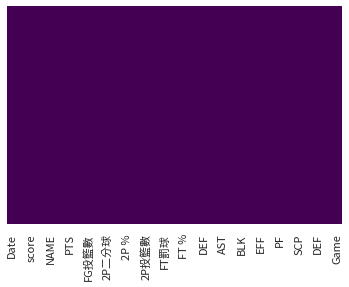

In [209]:
sns.heatmap(df_UBA.isnull(),yticklabels=False,cbar=False,cmap='viridis')

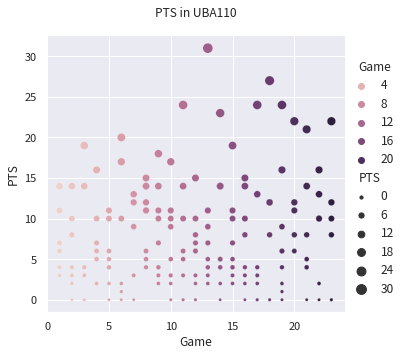

In [210]:
Cp_Points = df_UBA_champion["PTS"]
Cp_Ast =  df_UBA_champion["AST"]
PTS_all=sns.relplot(data=df_UBA, x="Game", y="PTS",hue="Game",size= "PTS",sizes =(10,100))
PTS_all.fig.suptitle('PTS in UBA110')
PTS_all.fig.subplots_adjust(top=.9)



Text(0.5, 0.98, 'PTS in UBA110 per player')

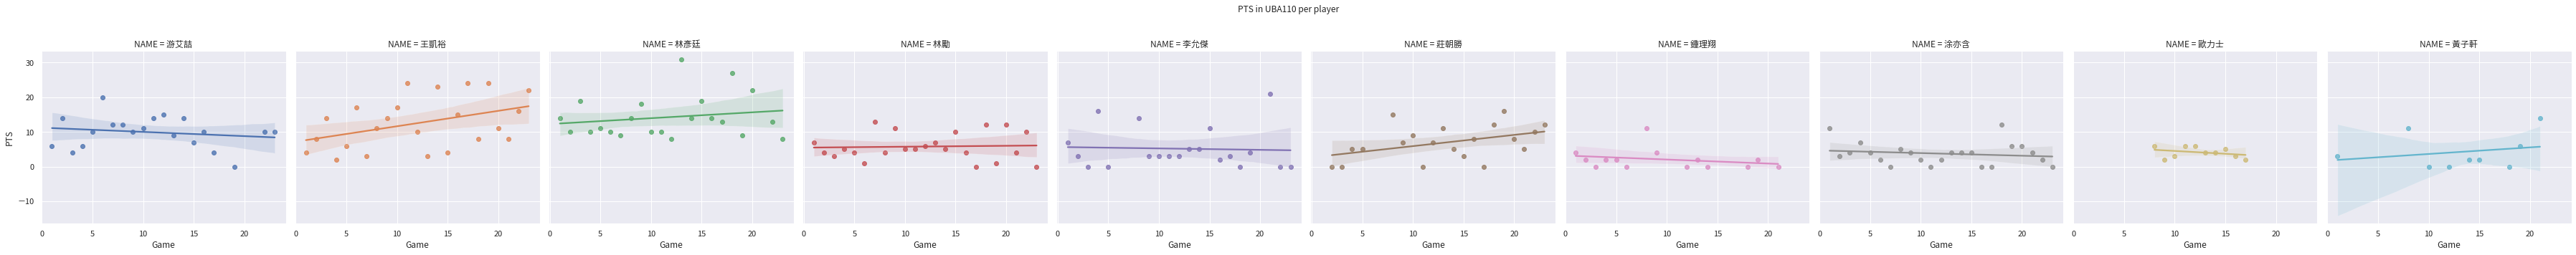

In [211]:
Points = df_UBA["PTS"]
Ast =  df_UBA["AST"]
# sns.lineplot(Points.index, Points.values, data=Points).set_title('Points in UBA')
# fig = plt.figure(figsize=(200,4))
# sns.relplot(data=df_UBA, x="Date", y="AST", hue="NAME")
# sns.set(rc={'figure.figsize':(11.7,8.27)})
PTS_UBA110=sns.lmplot(data=df_UBA, x="Game", y="PTS",hue="NAME",col = "NAME")
PTS_UBA110.fig.subplots_adjust(top=.8)
PTS_UBA110.fig.suptitle('PTS in UBA110 per player')



Text(0.5, 0.98, 'AST in UBA110 per player')

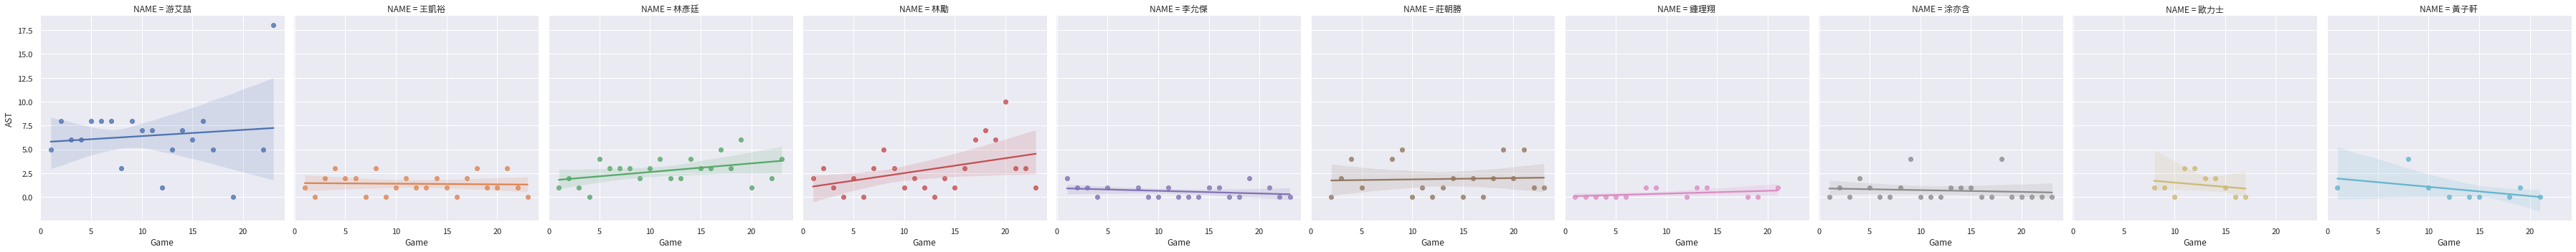

In [212]:
AST_UBA110=sns.lmplot(data=df_UBA, x="Game", y="AST",hue="NAME",col = "NAME")
PTS_UBA110.fig.subplots_adjust(top=.8)
PTS_UBA110.fig.suptitle('AST in UBA110 per player')